<a href="https://colab.research.google.com/github/kamya11/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [6]:
# import the relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime


In [7]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [8]:
# Explore the first 5 rows of the dataset using head

data= pd.read_csv("/content/drive/MyDrive/NYC Taxi Data.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [9]:
# check the shape of the data

data.shape


(1458644, 11)

In [10]:
# check the data types of all columns
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [11]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [12]:
# check the null values

data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [13]:
# Statistical details of the data

data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [14]:
# check the duplicate values in the dataset

data[data.duplicated()==True]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [15]:
# convert the object type into datetime 

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [16]:
# verify after converting the datatype

data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [17]:
print("Min pickup time:",min(data['pickup_datetime']))
print("Max pickup time:",max(data['pickup_datetime']))

Min pickup time: 2016-01-01 00:00:17
Max pickup time: 2016-06-30 23:59:39


In [18]:
import calendar

In [19]:
data['pickup_date']= data['pickup_datetime'].dt.date
data['pickup_day']=data['pickup_datetime'].apply(lambda x:x.day)
data['pickup_hour']=data['pickup_datetime'].apply(lambda x:x.hour)
data['pickup_day_of_week']=data['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
data['dropoff_date']= data['dropoff_datetime'].dt.date
data['dropoff_day']=data['dropoff_datetime'].apply(lambda x:x.day)
data['dropoff_hour']=data['dropoff_datetime'].apply(lambda x:x.hour)
data['dropoff_day_of_week']=data['dropoff_datetime'].apply(lambda x:calendar.day_name[x.weekday()])

In [20]:
# Round to 3 decimal places

data['pickup_latitude_round3']=data['pickup_latitude'].apply(lambda x:round(x,3))
data['pickup_longitude_round3']=data['pickup_longitude'].apply(lambda x:round(x,3))
data['dropoff_latitude_round3']=data['dropoff_latitude'].apply(lambda x:round(x,3))
data['dropoff_longitude_round3']=data['dropoff_longitude'].apply(lambda x:round(x,3))

In [21]:
# check the head after all the changes

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,pickup_latitude_round3,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday,40.768,-73.982,40.766,-73.965
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday,40.739,-73.980,40.731,-73.999
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday,40.764,-73.979,40.710,-74.005
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday,40.720,-74.010,40.707,-74.012
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday,40.793,-73.973,40.783,-73.973


In [22]:
# Calculate the distance 

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [23]:
from geopy.distance import great_circle

In [24]:
data['trip_distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [25]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,pickup_latitude_round3,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday,40.768,-73.982,40.766,-73.965,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday,40.739,-73.980,40.731,-73.999,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday,40.764,-73.979,40.710,-74.005,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday,40.720,-74.010,40.707,-74.012,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday,40.793,-73.973,40.783,-73.973,1.188590


In [26]:
# Names of all numeric columns

data.describe().columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_day',
       'pickup_hour', 'dropoff_day', 'dropoff_hour', 'pickup_latitude_round3',
       'pickup_longitude_round3', 'dropoff_latitude_round3',
       'dropoff_longitude_round3', 'trip_distance'],
      dtype='object')

In [27]:
# Converting the trip duration(sec) to trip duration(minutes)

data['trip_duration_in_minutes']=data['trip_duration'].apply(lambda x:x/60)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,pickup_latitude_round3,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3,trip_distance,trip_duration_in_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday,40.768,-73.982,40.766,-73.965,1.498523,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday,40.739,-73.980,40.731,-73.999,1.805510,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday,40.764,-73.979,40.710,-74.005,6.385108,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday,40.720,-74.010,40.707,-74.012,1.485501,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday,40.793,-73.973,40.783,-73.973,1.188590,7.250000


In [28]:
# Converting the trip duration(sec) to trip duration(hour)

data['trip_duration_in_hour']=data['trip_duration'].apply(lambda x:x/3600)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,pickup_latitude_round3,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3,trip_distance,trip_duration_in_minutes,trip_duration_in_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday,40.768,-73.982,40.766,-73.965,1.498523,7.583333,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday,40.739,-73.980,40.731,-73.999,1.805510,11.050000,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday,40.764,-73.979,40.710,-74.005,6.385108,35.400000,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday,40.720,-74.010,40.707,-74.012,1.485501,7.150000,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday,40.793,-73.973,40.783,-73.973,1.188590,7.250000,0.120833


In [29]:
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Distribution of Trip Duration')

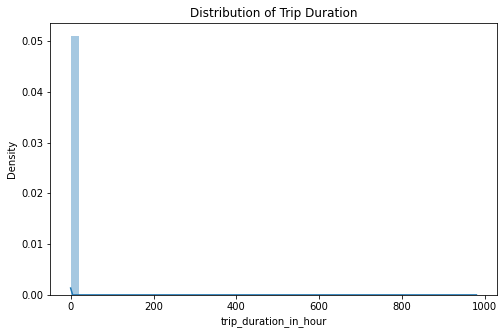

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(data['trip_duration_in_hour']).set_title("Distribution of Trip Duration")

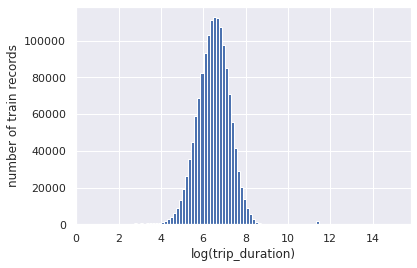

In [31]:
# Trip duration is highly right skewed , hence applying log to normalize

sns.set()
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
plt.hist(data['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

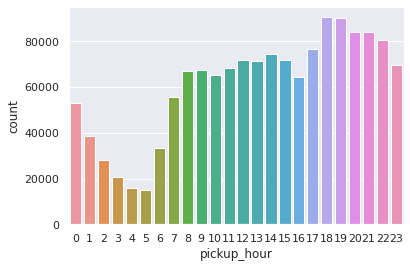

In [32]:
# Countplot of pickup hour

sns.countplot(data['pickup_hour'])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

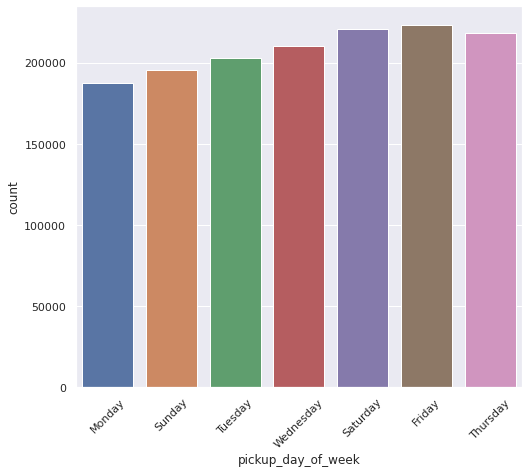

In [33]:
# Countplot of pickupday of week

fig = plt.figure(figsize=(8,7))
sns.countplot(data['pickup_day_of_week'])
plt.xticks(rotation = '45')

In [34]:
data['vendor_id'].value_counts(normalize = True)*100

2    53.495027
1    46.504973
Name: vendor_id, dtype: float64

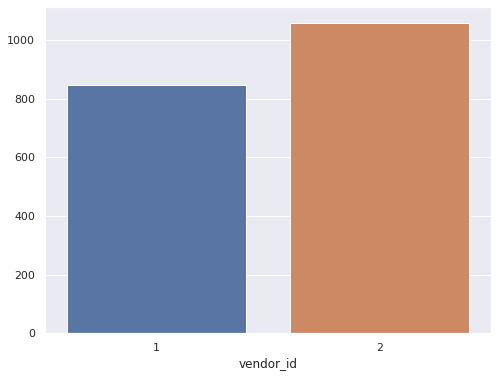

In [35]:
# Bar chart of vendor id

fig = plt.figure(figsize=(8,6))
g_vendor = data.groupby('vendor_id')['trip_duration'].mean()
sns.barplot(g_vendor.index,g_vendor.values)

In [36]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

<Figure size 576x504 with 0 Axes>

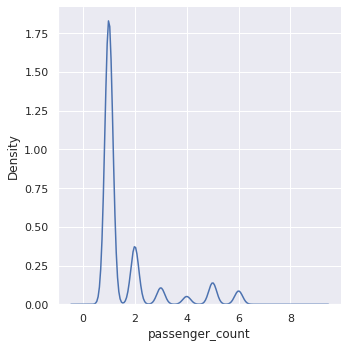

In [37]:
# Passenger count

fig = plt.figure(figsize=(8,7))
sns.displot(data, x="passenger_count", kind="kde", bw_adjust=2)

Text(0.5, 1.0, 'Distribution of Pickups Over time')

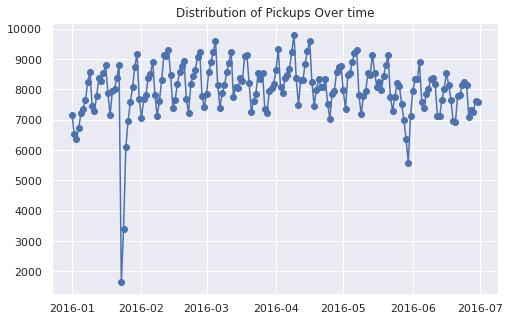

In [38]:
plt.figure(figsize=(8,5))
plt.plot(data.groupby('pickup_date').count()[['vendor_id']], 'o-',label='data')

plt.title('Distribution of Pickups Over time')

<Figure size 2160x1440 with 0 Axes>

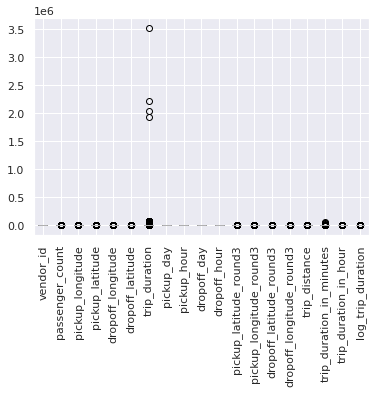

<Figure size 2160x1440 with 0 Axes>

In [39]:
# checking the outliers in the dataset

data.boxplot()
plt.xticks (rotation=90)
plt.figure(figsize=(30,20))

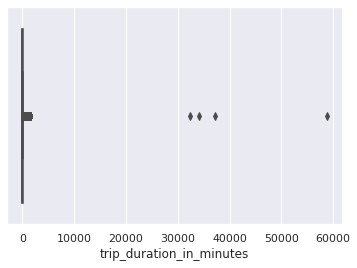

In [40]:
# Most outliers are present in column trip_duration

sns.boxplot(data['trip_duration_in_minutes'])

In [41]:
data['trip_duration'].sort_values(ascending=False).head(20)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
91717        86378
1221666      86378
66346        86377
1138915      86377
172662       86369
779030       86369
1284067      86369
1269316      86369
1213613      86367
1233528      86367
Name: trip_duration, dtype: int64

In [42]:
data['trip_duration'].value_counts(sort = True)

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
85305       1
83256       1
83884       1
6419        1
8522        1
Name: trip_duration, Length: 7417, dtype: int64

In [43]:
# Removing outliers

data = data[data.trip_duration <=86392 ]
data = data[data.trip_duration >= 30]

In [44]:
# Taking only those passenger count where the count is not zero

data=data[data['passenger_count']!=0]

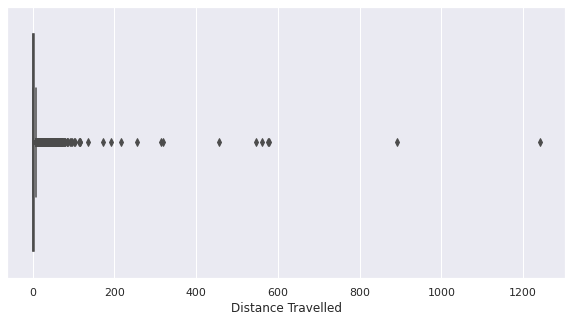

In [45]:
plt.figure(figsize = (10,5))
sns.boxplot(data.trip_distance)
plt.xlabel('Distance Travelled')
plt.show()

In [46]:
# removing outliers in column trip_distance

data = data[~(data.trip_distance > 100)]
data = data[~(data.trip_distance < 1)]

In [47]:
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,pickup_latitude_round3,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3,trip_distance,trip_duration_in_minutes,trip_duration_in_hour,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday,40.768,-73.982,40.766,-73.965,1.498523,7.583333,0.126389,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday,40.739,-73.980,40.731,-73.999,1.805510,11.050000,0.184167,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday,40.764,-73.979,40.710,-74.005,6.385108,35.400000,0.590000,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday,40.720,-74.010,40.707,-74.012,1.485501,7.150000,0.119167,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday,40.793,-73.973,40.783,-73.973,1.188590,7.250000,0.120833,6.077642
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,2016-01-30,30,22,Saturday,2016-01-30,30,22,Saturday,40.742,-73.983,40.749,-73.992,1.098944,7.383333,0.123056,6.095825
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,2016-06-17,17,22,Friday,2016-06-17,17,22,Friday,40.758,-73.969,40.766,-73.957,1.326280,5.683333,0.094722,5.834811
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,2016-05-21,21,7,Saturday,2016-05-21,21,8,Saturday,40.798,-73.969,40.761,-73.922,5.714989,25.850000,0.430833,7.347300
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,2016-05-27,27,23,Friday,2016-05-27,27,23,Friday,40.738,-73.999,40.733,-73.986,1.310355,4.250000,0.070833,5.545177
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,2016-03-10,10,21,Thursday,2016-03-10,10,22,Thursday,40.744,-73.981,40.790,-73.973,5.121169,20.416667,0.340278,7.111512


In [48]:
data['store_and_fwd_flag'].value_counts(normalize=True)*100

N    99.436118
Y     0.563882
Name: store_and_fwd_flag, dtype: float64

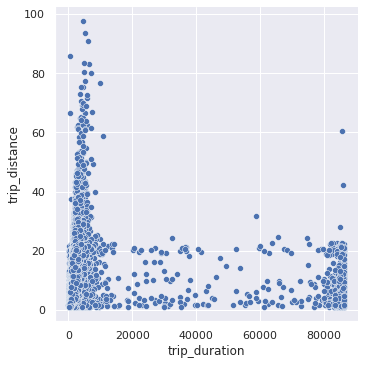

In [49]:
sns.relplot(y=data.trip_distance,x='trip_duration',data=data)

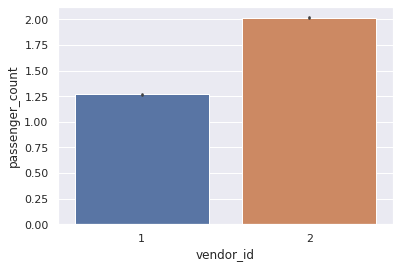

In [50]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

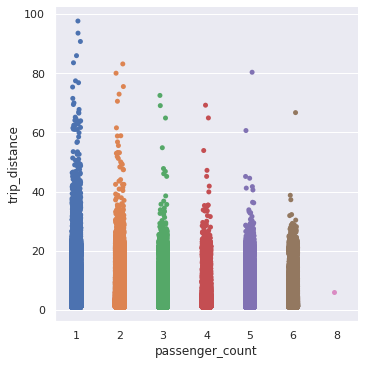

In [51]:
sns.catplot(y='trip_distance',x='passenger_count',data=data,kind='strip')

In [52]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,pickup_latitude_round3,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3,trip_distance,trip_duration_in_minutes,trip_duration_in_hour,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday,40.768,-73.982,40.766,-73.965,1.498523,7.583333,0.126389,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday,40.739,-73.980,40.731,-73.999,1.805510,11.050000,0.184167,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday,40.764,-73.979,40.710,-74.005,6.385108,35.400000,0.590000,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday,40.720,-74.010,40.707,-74.012,1.485501,7.150000,0.119167,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday,40.793,-73.973,40.783,-73.973,1.188590,7.250000,0.120833,6.077642


In [53]:

data=data.drop(['id','pickup_datetime', 'dropoff_datetime','pickup_day_of_week','dropoff_day_of_week', 'store_and_fwd_flag',
                'pickup_date','dropoff_date','trip_duration_in_minutes','pickup_longitude','pickup_latitude','dropoff_longitude',
                'dropoff_latitude','trip_duration','dropoff_hour'], axis=1)
data.head()

,vendor_id,passenger_count,pickup_day,pickup_hour,dropoff_day,pickup_latitude_round3,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3,trip_distance,trip_duration_in_hour,log_trip_duration
0,2,1,14,17,14,40.768,-73.982,40.766,-73.965,1.498523,0.126389,6.122493
1,1,1,12,0,12,40.739,-73.980,40.731,-73.999,1.805510,0.184167,6.498282
2,2,1,19,11,19,40.764,-73.979,40.710,-74.005,6.385108,0.590000,7.661527
3,2,1,6,19,6,40.720,-74.010,40.707,-74.012,1.485501,0.119167,6.063785
4,2,1,26,13,26,40.793,-73.973,40.783,-73.973,1.188590,0.120833,6.077642


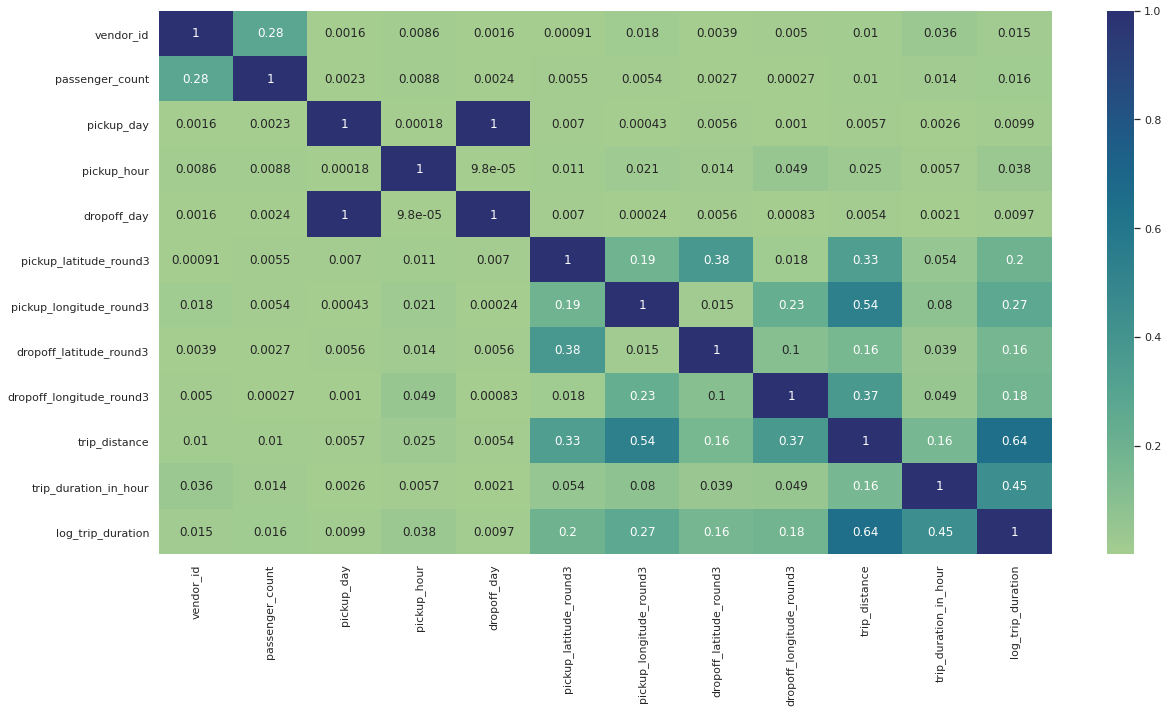

In [54]:
# Correlation map

plt.figure(figsize = (20,10))
correlation = data.corr()
sns.heatmap(abs(correlation),annot = True,cmap = 'crest')

In [3]:
from sklearn.model_selection import train_test_split

In [55]:
# defining the dependent and independent variables

X = data.drop(['trip_duration_in_hour','log_trip_duration','dropoff_day'], axis=1)
y = np.log10(data['trip_duration_in_hour'])

In [56]:
# train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(970132, 9) (970132,)
(242534, 9) (242534,)


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**LINEAR REGRESSION**

In [60]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [62]:
r2_score(y_train,y_train_pred)

0.4289456133230962

In [63]:
r2_score(y_test,y_pred)

0.4319946824149352

In [64]:
mean_squared_error(y_test,y_pred)

0.04587193778161526

**LASSO REGRESSION**

In [66]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_regressor = GridSearchCV(estimator=lasso,param_grid = parameters , scoring='r2',cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [67]:
lasso_regressor.best_params_

{'alpha': 0.0001}

In [68]:
lasso_regressor.best_score_

0.42868407361975375

In [69]:
lasso_regressor.score(X_train,y_train)

0.42894397979291565

In [70]:
y_pred_lasso_train = lasso_regressor.predict(X_train)
y_pred_lasso_test = lasso_regressor.predict(X_test)

In [71]:
lasso_train_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE for lasso regression  :" , lasso_train_mse)

lasso_train_rmse = np.sqrt(lasso_train_mse)
print("Train RMSE for lasso regression :" ,lasso_train_rmse)

lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 score for lasso regression :" ,lasso_train_r2)

lasso_train_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 score for lasso regression : ", lasso_train_r2)

Train MSE for lasso regression  : 0.04636332521263933
Train RMSE for lasso regression : 0.21532144624407326
Train R2 score for lasso regression : 0.42894397979291565
Train Adjusted R2 score for lasso regression :  0.42894397979291565


In [72]:
lasso_test_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE for lasso regression :" , lasso_test_mse)

lasso_test_rmse = np.sqrt(lasso_test_mse)
print("Test RMSE for lasso regression :" ,lasso_test_rmse)

lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 for lasso regression :" ,lasso_test_r2)

lasso_test_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 for lasso regression: ", lasso_test_r2_)

Test MSE for lasso regression : 0.04587349960778216
Test RMSE for lasso regression : 0.2141809973078428
Test R2 for lasso regression : 0.43197534323697917
Test Adjusted R2 for lasso regression:  0.4319542639957047


**RIDGE REGRESSION**

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [74]:
ridge = Ridge()
params ={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

# applying gridsearch 
ridge_regressor = GridSearchCV(estimator=ridge , scoring='r2', param_grid=params, cv=3  , verbose=2)
ridge_regressor.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] alpha=1e-15 .....................................................
[CV] ...................................... alpha=1e-15, total=   0.1s
[CV] alpha=1e-15 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................................... alpha=1e-15, total=   0.2s
[CV] alpha=1e-15 .....................................................
[CV] ...................................... alpha=1e-15, total=   0.2s
[CV] alpha=1e-13 .....................................................
[CV] ...................................... alpha=1e-13, total=   0.2s
[CV] alpha=1e-13 .....................................................
[CV] ...................................... alpha=1e-13, total=   0.2s
[CV] alpha=1e-13 .....................................................
[CV] ...................................... alpha=1e-13, total=   0.2s
[CV] alpha=1e-10 .....................................................
[CV] ...................................... alpha=1e-10, total=   0.2s
[CV] alpha=1e-10 .....................................................
[CV] ...................................... alpha=1e-10, total=   0.2s
[CV] alpha=1e-10 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=2)

In [75]:
print("the best alpha for ridge is :",ridge_regressor.best_params_)
print("the best r2 score for ridge is:",ridge_regressor.best_score_)

the best alpha for ridge is : {'alpha': 100}
the best r2 score for ridge is: 0.42865642417888944


In [76]:
y_pred_ridge_train = ridge_regressor.predict(X_train)
y_pred_ridge_test = ridge_regressor.predict(X_test)

In [77]:
ridge_train_mse = print(" mse value for ridge train is:",  mean_squared_error(y_train , y_pred_ridge_train))
ridge_train_r2 = print("r2 score for the ridge train is: ", r2_score(y_train,y_pred_ridge_train))
ridge_train_r2_= print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

 mse value for ridge train is: 0.04636319349165875
r2 score for the ridge train is:  0.4289456021972319
Train Adjusted R2 :  0.428940304420684


In [78]:
ridge_test_mse = print("mse for ridge test is:", mean_squared_error(y_test,y_pred_ridge_test))
ridge_test_r2 = print("r2 score for the ridge train is: ", r2_score(y_test,y_pred_ridge_test))
ridge_test_r2_adj=print("Test Adjusted R2 : ", 1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mse for ridge test is: 0.04587207630964457
r2 score for the ridge train is:  0.43199296710354684
Test Adjusted R2 :  0.4319718885162892


**DECISION TREE**

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
max_depth = [3,4,7,10]
min_samples_split = [12,23,29]
min_samples_leaf = [8,16,22]
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [81]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor()

#grid search
dt_grid_search = GridSearchCV(estimator=dt, param_grid=param_dict_dt , cv=3,verbose=2,scoring='r2')

dt_grid_search.fit(X_train , y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] max_depth=3, min_samples_leaf=8, min_samples_split=12 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, min_samples_leaf=8, min_samples_split=12, total=   1.6s
[CV] max_depth=3, min_samples_leaf=8, min_samples_split=12 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=3, min_samples_leaf=8, min_samples_split=12, total=   1.5s
[CV] max_depth=3, min_samples_leaf=8, min_samples_split=12 ...........
[CV]  max_depth=3, min_samples_leaf=8, min_samples_split=12, total=   1.6s
[CV] max_depth=3, min_samples_leaf=8, min_samples_split=23 ...........
[CV]  max_depth=3, min_samples_leaf=8, min_samples_split=23, total=   1.6s
[CV] max_depth=3, min_samples_leaf=8, min_samples_split=23 ...........
[CV]  max_depth=3, min_samples_leaf=8, min_samples_split=23, total=   1.6s
[CV] max_depth=3, min_samples_leaf=8, min_samples_split=23 ...........
[CV]  max_depth=3, min_samples_leaf=8, min_samples_split=23, total=   1.5s
[CV] max_depth=3, min_samples_leaf=8, min_samples_split=29 ...........
[CV]  max_depth=3, min_samples_leaf=8, min_samples_split=29, total=   1.5s
[CV] max_depth=3, min_samples_leaf=8, min_samples_split=29 ...........
[CV]  max_depth=3, min_samples_leaf=8, min_samples_split=29, total=   1.6s
[CV] max_depth=3, min_samples_leaf=8, min_samples

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  5.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 7, 10],
                         'min_samples_leaf': [8, 16, 22],
                         'min_samples_split'

In [82]:
dt_grid_search.best_score_

0.6360639922001375

In [83]:
dt_grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 12}

In [84]:
dt_grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=22, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [85]:
dt_train_pred = dt_grid_search.predict(X_train)
dt_test_pred = dt_grid_search.predict(X_test)

In [86]:
dt_train_mse= print("mse for the decision tree on training is:", mean_squared_error(y_train , dt_train_pred))
dt_train_r2 = print("Train R2 :",r2_score(y_train, dt_train_pred))
dt_train_r2_adj = print("Train Adjusted R2 : ",1-(1-r2_score(y_train, dt_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

mse for the decision tree on training is: 0.029121999143723737
Train R2 : 0.6413050001220505
Train Adjusted R2 :  0.6413016724426464


In [87]:
dt_test_mse = print("mse for the test is :" , mean_squared_error(y_test , dt_test_pred))
dt_test_r2 = print("r2 score for the test is:",r2_score(y_test,dt_test_pred))
dt_test_r2_adj = print("Train Adjusted R2 : ",1-(1-r2_score(y_test, dt_test_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))


mse for the test is : 0.02929686985206241
r2 score for the test is: 0.6372340330641454
Train Adjusted R2 :  0.637230667617632
